# Positive selection primer design

This notebook takes positive selection dataframe and designs NNS primers for each position

In [1]:
import pandas as pd
from plotnine import *
from Bio.SeqUtils import MeltingTemp as mt
import statistics

In [2]:
reference_lookup = snakemake.input.reference_lookup
positive_sel_df = snakemake.input.positive_sel_df
create_primers_srcipt = snakemake.input.create_primers_srcipt
spike_extended = snakemake.input.spike_extended

full_length_spike_primers_NNG = snakemake.output.full_length_spike_primers_NNG
full_length_spike_primers_NNC = snakemake.output.full_length_spike_primers_NNC
PS_length_spike_primer_df_NNG_out = snakemake.output.PS_length_spike_primer_df_NNG_out
PS_length_spike_primer_df_NNC_out = snakemake.output.PS_length_spike_primer_df_NNC_out
PS_length_spike_primer_df_out = snakemake.output.PS_length_spike_primer_df_out

In [37]:
# reference_lookup = '../reference_sequences/reference_sequence_position_lookup.csv'
# positive_sel_df = '../results/spike_positive_selection_sites.csv'
# create_primers_srcipt = '../scripts/2021Jan_create_primers.py'
# spike_extended = '../reference_sequences/Omicron_BA.1_extended_ends_for_primers.txt'

# full_length_spike_primers_NNG = '../results/FULL_LENGTH_Spike_primer_positive_selection_NNG.csv'
# full_length_spike_primers_NNC = '../results/FULL_LENGTH_Spike_primer_positive_selection_NNC.csv'
# PS_length_spike_primer_df_NNG_out = '../results/Positive_selection_site_primers_NNG.csv'
# PS_length_spike_primer_df_NNC_out = '../results/Positive_selection_site_primers_NNC.csv'
# PS_length_spike_primer_df_out = '../results/pool_positive_selection_site_primers_all.csv'


In [38]:
reference_lookup = pd.read_csv(reference_lookup)
positive_sel_df = pd.read_csv(positive_sel_df)

In [39]:
#merge lookup and positive selection site tables and keep only sites that undergo positive selection
#or are variant signature mutations
new_positive_sel_df = pd.merge(positive_sel_df,
                  reference_lookup,
                  how='right',
                  left_on=['site'],
                  right_on = ['parent_pos'],
                  indicator=True)

In [40]:
new_positive_sel_df = new_positive_sel_df[(new_positive_sel_df._merge == 'right_only') & (new_positive_sel_df.variant_sig == 'Yes') | (new_positive_sel_df._merge == 'both')]
new_positive_sel_df = new_positive_sel_df[new_positive_sel_df['variant_pos'].notna()]
new_positive_sel_df = new_positive_sel_df.sort_values(by=['site'],ignore_index=True)

In [41]:
new_positive_sel_df


,site,p,n_time_windows,parent_seq,variant_seq,parent_pos,variant_pos,variant_sig,_merge
0,5.0,0.002201,16.0,L,L,5.0,5.0,No,both
1,12.0,0.006430,5.0,S,S,12.0,12.0,No,both
2,13.0,0.008677,8.0,S,S,13.0,13.0,No,both
3,18.0,0.007383,13.0,L,L,18.0,18.0,No,both
4,19.0,0.005278,6.0,T,T,19.0,19.0,No,both
...,...,...,...,...,...,...,...,...,...
92,NaN,NaN,NaN,N,K,764.0,761.0,Yes,right_only
93,NaN,NaN,NaN,N,K,856.0,853.0,Yes,right_only
94,NaN,NaN,NaN,Q,H,954.0,951.0,Yes,right_only
95,NaN,NaN,NaN,N,K,969.0,966.0,Yes,right_only


In [42]:
new_positive_sel_df = new_positive_sel_df[['variant_pos','variant_seq','n_time_windows', 'p']]
new_positive_sel_df

,variant_pos,variant_seq,n_time_windows,p
0,5.0,L,16.0,0.002201
1,12.0,S,5.0,0.006430
2,13.0,S,8.0,0.008677
3,18.0,L,13.0,0.007383
4,19.0,T,6.0,0.005278
...,...,...,...,...
92,761.0,K,NaN,NaN
93,853.0,K,NaN,NaN
94,951.0,H,NaN,NaN
95,966.0,K,NaN,NaN


## Design primers

### NNG primers

In [43]:
# run primer design script
!python {create_primers_srcipt} \
    {spike_extended} \
    positiveSelectionSpike_NNG \
    1 \
    {full_length_spike_primers_NNG} \
    --ambiguous_codon NNG \
    --minprimertm 60.5 \
    --output opools \
    --maxprimertm 61.5

Read the following command line arguments
	sequencefile = ../reference_sequences/Omicron_BA.1_extended_ends_for_primers.txt
	primerprefix = positiveSelectionSpike_NNG
	firstcodon = 1
	outfile = ../results/FULL_LENGTH_Spike_primer_positive_selection_NNG.csv
	startprimerlength = 37
	maxprimertm = 61.5
	minprimertm = 60.5
	minlength = 25
	maxlength = 51
	ambiguous_codon = NNG
	output = opools
Read a sequence of length 3840 from ../reference_sequences/Omicron_BA.1_extended_ends_for_primers.txt:
gcagccgagccacatcgctcaacgcgtgccaccATGTTTGTGTTCCTGGTGCTGCTGCCACTGGTGTCCAGCCAGTGTGTGAACCTGACCACCAGGACCCAACTTCCTCCTGCCTACACCAACTCCTTCACCAGGGGAGTCTACTACCCTGACAAGGTGTTCAGGTCCTCTGTGCTGCACAGCACCCAGGACCTGTTCCTGCCATTCTTCAGCAATGTGACCTGGTTCCATGTGATCTCTGGCACCAATGGCACCAAGAGGTTTGACAACCCTGTGCTGCCATTCAATGATGGAGTCTACTTTGCCAGCATCGAGAAGAGCAACATCATCAGGGGCTGGATTTTTGGCACCACCCTGGACAGCAAGACCCAGTCCCTGCTGATTGTGAACAATGCCACCAATGTGGTGATTAAGGTGTGTGAGTTCCAGTTCTGTAATGACCCATTCCTGGACCACAAGAACAACAAGTCCTGGATGGAGTCTGAGTTCAGGGTCTACTCCTCT

In [44]:
#import primer table
full_length_spike_primer_df = pd.read_csv(full_length_spike_primers_NNG)

Extract site from primer name

In [45]:
full_length_spike_primer_df['site'] = full_length_spike_primer_df['Primer name'].str.extract('(\d+)')
full_length_spike_primer_df['site'] = full_length_spike_primer_df['site'].astype(float)

Now merge `new_positive_sel_df` with primer table so you only take primers used for positively aelected sites

In [46]:
#now merge tables just on parent position
PS_length_spike_primer_df_NNG = pd.merge(new_positive_sel_df,
                  full_length_spike_primer_df,
                  how='left',
                  left_on=['variant_pos'],
                  right_on = ['site'])

In [47]:
PS_length_spike_primer_df_NNG.to_csv(PS_length_spike_primer_df_NNG_out, index=False) 

### NNC primers

In [48]:
# run primer design script
!python {create_primers_srcipt} \
    {spike_extended} \
    positiveSelectionSpike_NNC \
    1 \
    {full_length_spike_primers_NNC} \
    --ambiguous_codon NNC \
    --minprimertm 60.5 \
    --output opools \
    --maxprimertm 61.5

Read the following command line arguments
	sequencefile = ../reference_sequences/Omicron_BA.1_extended_ends_for_primers.txt
	primerprefix = positiveSelectionSpike_NNC
	firstcodon = 1
	outfile = ../results/FULL_LENGTH_Spike_primer_positive_selection_NNC.csv
	startprimerlength = 37
	maxprimertm = 61.5
	minprimertm = 60.5
	minlength = 25
	maxlength = 51
	ambiguous_codon = NNC
	output = opools
Read a sequence of length 3840 from ../reference_sequences/Omicron_BA.1_extended_ends_for_primers.txt:
gcagccgagccacatcgctcaacgcgtgccaccATGTTTGTGTTCCTGGTGCTGCTGCCACTGGTGTCCAGCCAGTGTGTGAACCTGACCACCAGGACCCAACTTCCTCCTGCCTACACCAACTCCTTCACCAGGGGAGTCTACTACCCTGACAAGGTGTTCAGGTCCTCTGTGCTGCACAGCACCCAGGACCTGTTCCTGCCATTCTTCAGCAATGTGACCTGGTTCCATGTGATCTCTGGCACCAATGGCACCAAGAGGTTTGACAACCCTGTGCTGCCATTCAATGATGGAGTCTACTTTGCCAGCATCGAGAAGAGCAACATCATCAGGGGCTGGATTTTTGGCACCACCCTGGACAGCAAGACCCAGTCCCTGCTGATTGTGAACAATGCCACCAATGTGGTGATTAAGGTGTGTGAGTTCCAGTTCTGTAATGACCCATTCCTGGACCACAAGAACAACAAGTCCTGGATGGAGTCTGAGTTCAGGGTCTACTCCTCT

In [49]:
#import primer table
full_length_spike_primer_df = pd.read_csv(full_length_spike_primers_NNC)
full_length_spike_primer_df

,Pool name,Primer name,Ambiguous codon,Sequence
0,positiveSelectionSpike_NNC_ForPool,positiveSelectionSpike_NNC-for-mut1,NNC,cgcgtgccaccNNCTTTGTGTTCCT
1,positiveSelectionSpike_NNC_ForPool,positiveSelectionSpike_NNC-for-mut2,NNC,gtgccaccATGNNCGTGTTCCTGGT
2,positiveSelectionSpike_NNC_ForPool,positiveSelectionSpike_NNC-for-mut3,NNC,gccaccATGTTTNNCTTCCTGGTGCTG
3,positiveSelectionSpike_NNC_ForPool,positiveSelectionSpike_NNC-for-mut4,NNC,ccATGTTTGTGNNCCTGGTGCTGCTG
4,positiveSelectionSpike_NNC_ForPool,positiveSelectionSpike_NNC-for-mut5,NNC,TGTTTGTGTTCNNCGTGCTGCTGCC
...,...,...,...,...
2495,positiveSelectionSpike_NNC_RevPool,positiveSelectionSpike_NNC-rev-mut1246,NNC,taTCAGGAGCCACAGNNACAACAGCCTTTCA
2496,positiveSelectionSpike_NNC_RevPool,positiveSelectionSpike_NNC-rev-mut1247,NNC,attaTCAGGAGCCGNNGGAACAACAGCC
2497,positiveSelectionSpike_NNC_RevPool,positiveSelectionSpike_NNC-rev-mut1248,NNC,gcctcattaTCAGGAGNNACAGGAACAACAGC
2498,positiveSelectionSpike_NNC_RevPool,positiveSelectionSpike_NNC-rev-mut1249,NNC,cgcctcattaTCAGNNGCCACAGGAACAA


In [50]:
full_length_spike_primer_df['site'] = full_length_spike_primer_df['Primer name'].str.extract('(\d+)')
full_length_spike_primer_df['site'] = full_length_spike_primer_df['site'].astype(float)

In [51]:
#now merge tables just on parent position
PS_length_spike_primer_df_NNC = pd.merge(new_positive_sel_df,
                  full_length_spike_primer_df,
                  how='left',
                  left_on=['variant_pos'],
                  right_on = ['site'])

In [52]:
PS_length_spike_primer_df_NNC.to_csv(PS_length_spike_primer_df_NNC_out, index=False) 

### Concat NNG and NNC primer tables

In [53]:
frames = [PS_length_spike_primer_df_NNG, PS_length_spike_primer_df_NNC]
PS_length_spike_primer_df = pd.concat(frames)


In [54]:
PS_length_spike_primer_df = PS_length_spike_primer_df[['Pool name','Primer name','Sequence']]

In [55]:
PS_length_spike_primer_df.to_csv(PS_length_spike_primer_df_out, index=False) 

In [56]:
PS_length_spike_primer_df

,Pool name,Primer name,Sequence
0,positiveSelectionSpike_NNG_ForPool,positiveSelectionSpike_NNG-for-mut5,TGTTTGTGTTCNNGGTGCTGCTGCC
1,positiveSelectionSpike_NNG_RevPool,positiveSelectionSpike_NNG-rev-mut5,GGCAGCAGCACCNNGAACACAAACA
2,positiveSelectionSpike_NNG_ForPool,positiveSelectionSpike_NNG-for-mut12,TGCCACTGGTGNNGAGCCAGTGTGT
3,positiveSelectionSpike_NNG_RevPool,positiveSelectionSpike_NNG-rev-mut12,ACACACTGGCTCNNCACCAGTGGCA
4,positiveSelectionSpike_NNG_ForPool,positiveSelectionSpike_NNG-for-mut13,CACTGGTGTCCNNGCAGTGTGTGAAC
...,...,...,...
189,positiveSelectionSpike_NNC_RevPool,positiveSelectionSpike_NNC-rev-mut951,AGCCTGGGCATTGNNGTTCACCACATC
190,positiveSelectionSpike_NNC_ForPool,positiveSelectionSpike_NNC-for-mut966,CAACTTTCCAGCNNCTTTGGAGCCATCT
191,positiveSelectionSpike_NNC_RevPool,positiveSelectionSpike_NNC-rev-mut966,AGATGGCTCCAAAGNNGCTGGAAAGTTG
192,positiveSelectionSpike_NNC_ForPool,positiveSelectionSpike_NNC-for-mut978,GCTGAATGACATCNNCAGCAGACTGGACAA


In [57]:
PS_length_spike_primer_df['Tm'] = PS_length_spike_primer_df.apply(lambda x: '%0.2f' % mt.Tm_NN(x.Sequence, strict=False), axis=1)
PS_length_spike_primer_df['Tm'] = PS_length_spike_primer_df['Tm'].astype('float')
PS_length_spike_primer_df['length'] = PS_length_spike_primer_df.apply(lambda x: len(x.Sequence), axis=1)
PS_length_spike_primer_df

,Pool name,Primer name,Sequence,Tm,length
0,positiveSelectionSpike_NNG_ForPool,positiveSelectionSpike_NNG-for-mut5,TGTTTGTGTTCNNGGTGCTGCTGCC,60.90,25
1,positiveSelectionSpike_NNG_RevPool,positiveSelectionSpike_NNG-rev-mut5,GGCAGCAGCACCNNGAACACAAACA,60.90,25
2,positiveSelectionSpike_NNG_ForPool,positiveSelectionSpike_NNG-for-mut12,TGCCACTGGTGNNGAGCCAGTGTGT,62.41,25
3,positiveSelectionSpike_NNG_RevPool,positiveSelectionSpike_NNG-rev-mut12,ACACACTGGCTCNNCACCAGTGGCA,62.41,25
4,positiveSelectionSpike_NNG_ForPool,positiveSelectionSpike_NNG-for-mut13,CACTGGTGTCCNNGCAGTGTGTGAAC,60.40,26
...,...,...,...,...,...
189,positiveSelectionSpike_NNC_RevPool,positiveSelectionSpike_NNC-rev-mut951,AGCCTGGGCATTGNNGTTCACCACATC,61.43,27
190,positiveSelectionSpike_NNC_ForPool,positiveSelectionSpike_NNC-for-mut966,CAACTTTCCAGCNNCTTTGGAGCCATCT,59.46,28
191,positiveSelectionSpike_NNC_RevPool,positiveSelectionSpike_NNC-rev-mut966,AGATGGCTCCAAAGNNGCTGGAAAGTTG,59.46,28
192,positiveSelectionSpike_NNC_ForPool,positiveSelectionSpike_NNC-for-mut978,GCTGAATGACATCNNCAGCAGACTGGACAA,60.88,30


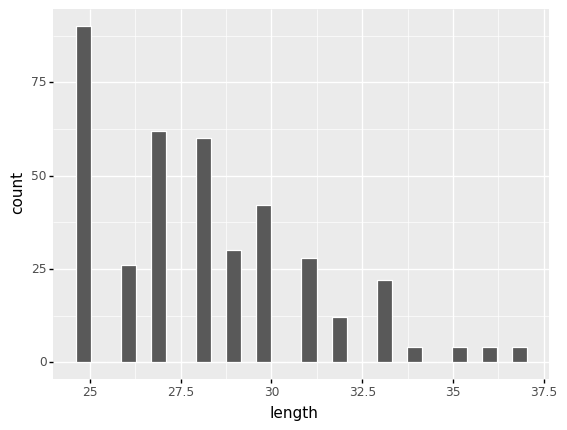

<bound method ggplot.draw of <ggplot: (8742935159528)>>

In [58]:
p = (ggplot(PS_length_spike_primer_df) + 
     aes('length') + 
     geom_histogram(color='white',bins=30)
    )

p.draw

/home/bdadonai/miniconda3/envs/SARS-CoV-2_Omicron_spike_DMS/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


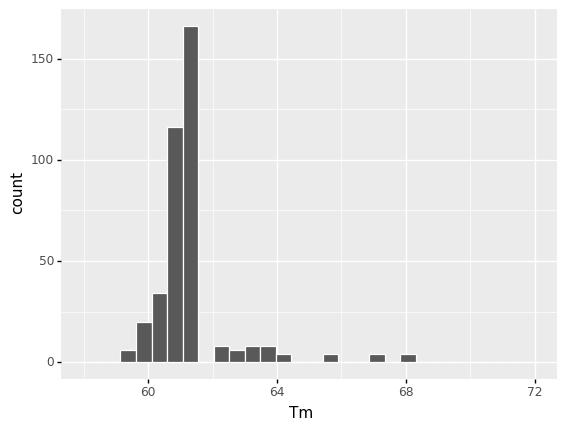

<bound method ggplot.draw of <ggplot: (8742935290326)>>

In [59]:
p = (ggplot(PS_length_spike_primer_df) + 
     aes('Tm') + 
     geom_histogram(color='white', bins=30)+
     xlim(58,72)
    )

p.draw